In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
from matplotlib.pyplot import savefig

In [19]:
def write_dict(tsv_file):
    """takes a tsv file and reads it as a dictionary
    tsv_file : input tsv file
    read_count_dict : ouput dictionary
    dictionary keys : gene names
    dictionary values : read count (int)
    """
    read_count_dict = {} #initialise dictionary
    with open(tsv_file) as f:
        next(f) #skipping the header
        for line in f:
            (k, v) = line.split('\t')
            read_count_dict[k.strip()] = int(v.strip())
            
    return(read_count_dict)

In [37]:
a = write_dict('raw_data/sampleA.txt')
b = write_dict('raw_data/sampleB.txt')

In [35]:
def read_count_sig(dict_a, dict_b): #change name?
    """dict_a , dict_b : dictionary
    takes two dictionaries, calculates the total readcounts for each dictionary(sample). 
    if the same gene is in both samples, it determines the readcount for the gene in each sample.
    if the readcount does not equal 0 in both cases, a chi squared test is performed.
    the test values for chi squared are the gene readcount for each sample and the total readcounts of each sample.
    output : tuple of numpy arrays of sample a readcounts, sample b readcounts, all pvalues"""
    total_read_count_a = sum(dict_a.values())
    total_read_count_b = sum(dict_b.values())
    all_a_readcounts = []
    all_b_readcounts = []
    all_pvalues = []
    for gene in dict_a.keys():
        if gene in dict_b.keys():
            count_a = dict_a[gene]
            count_b = dict_b[gene]
        else
        if (count_a == 0) and (count_b == 0): #chisquared won't work with both 0s
            all_a_readcounts.append(count_a)
            all_b_readcounts.append(count_b)
            all_pvalues.append(1.0) #the difference between readcount=0 and readcount=0 will never be significant
        else:
            contingency_table = np.array([[count_a, (total_read_count_a - count_a)], [count_b, (total_read_count_b - count_b)]])
            chi2_output = chi2_contingency(contingency_table)
            all_a_readcounts.append(count_a)
            all_b_readcounts.append(count_b)
            all_pvalues.append(chi2_output[1])
    return(np.array(all_a_readcounts), np.array(all_b_readcounts), np.array(all_pvalues)) #returns tuple of numpy arrays

In [24]:
x, y, pvals = read_count_sig(a, b)

In [17]:
#set up variables with input filenames (sys.argv[1] in final script)
file_name_a = 'raw_data/sampleA.txt'
file_name_b = 'raw_data/sampleB.txt'
x, y, pvals = read_count_sig(sample_a_dict, sample_b_dict)

NameError: name 'sample_a_dict' is not defined

In [29]:
p_adjusted = multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False) #calc padj
sig_or_not = p_adjusted[0]

In [31]:
def read_count_scatter(x, y, sig_or_not):
    """writes a scatterplot of gene counts for each sample, colour-coded for significance, to a pdf
    x : sample a readcounts (np.array)
    y : sample b readcounts (np.array)
    sig_or_not : pvalues corrected for multiple testing (np.array, boolean), True=hypothesis rejected for alpha=0.05"""
    plt.scatter(x[sig_or_not],y[sig_or_not], label='Significant', c='r') #significant read count differences coloured red
    plt.scatter(x[~sig_or_not], y[~sig_or_not], label='Not Significant', c='b') #nonsig read count differences coloured blue
    plt.title("Gene Read Counts")
    plt.xlabel("Sample A Read Counts")
    plt.ylabel("Sample B Read Counts")
    plt.legend()
    savefig('scatter_plot.pdf')

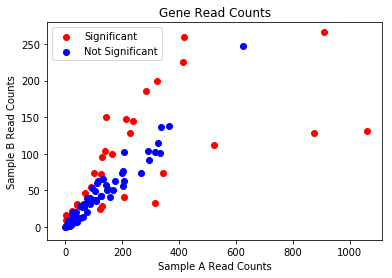

In [33]:
read_count_scatter(x, y, sig_or_not)

In [34]:
! evince scatter_plot.pdf